In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
churn_data = pd.read_csv('data/churn.csv')

churn_data = churn_data.drop('RowNumber', axis=1) # удаляем столбец RowNumber

##### Задания:

##### 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

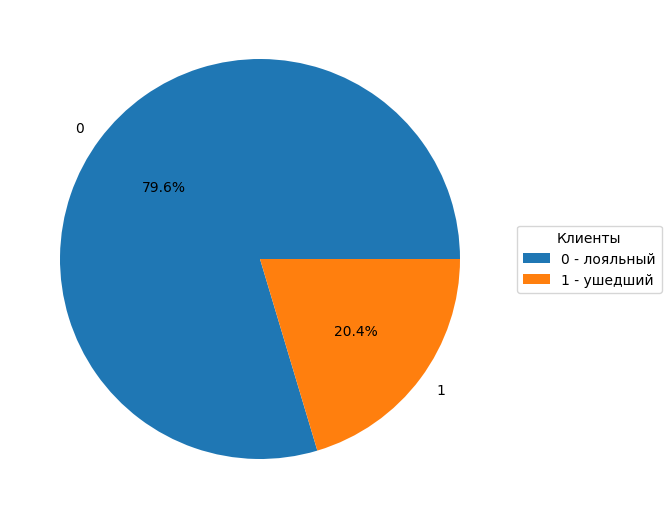

In [3]:
churn_rate = churn_data['Exited'].value_counts() # выбираем данные клиентов по признаку лояльности
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_rate,
    labels=churn_rate.index,
    autopct='%.1f%%'
)
axes.legend(['0 - лояльный', '1 - ушедший'],
    title="Клиенты",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1))

##### Вывод: Банк потерял более 20% клиентов. Однако, на основании этого графика неясно за какой период произошли потери и приносили ли эти клиенты ощутимую прибыль банку.

##### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

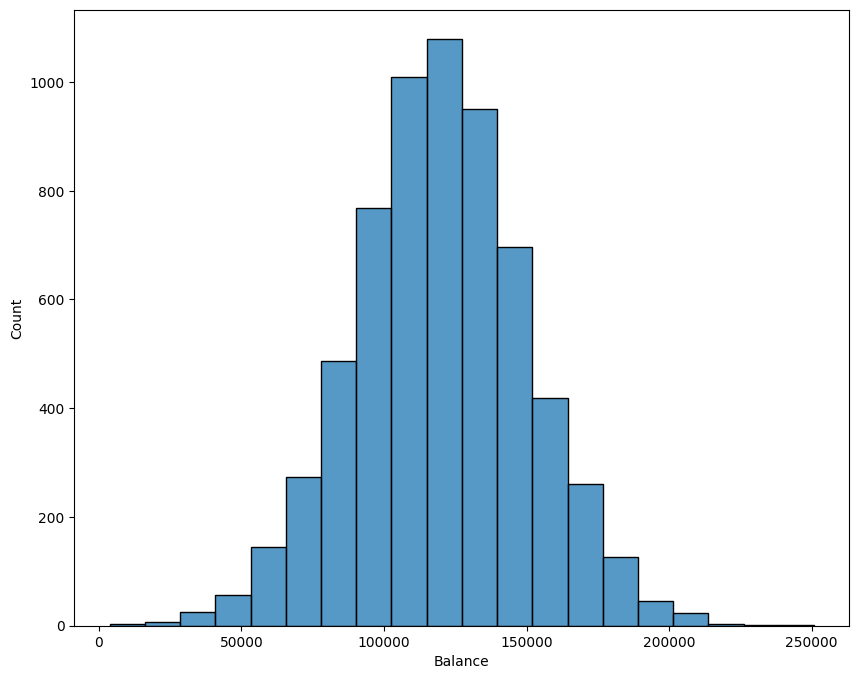

In [4]:
user_balance=churn_data[churn_data['Balance'] > 2500] # проводим сортировку по признаку остатка денежных средств на счете более 2500
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.histplot(
    data=user_balance,
    x='Balance',
    bins=20,
    kde=False,
);

##### Вывод: Диаграмма имеет вид норmального распределения. Большенство клиентов банка имеет на счету более 100000

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

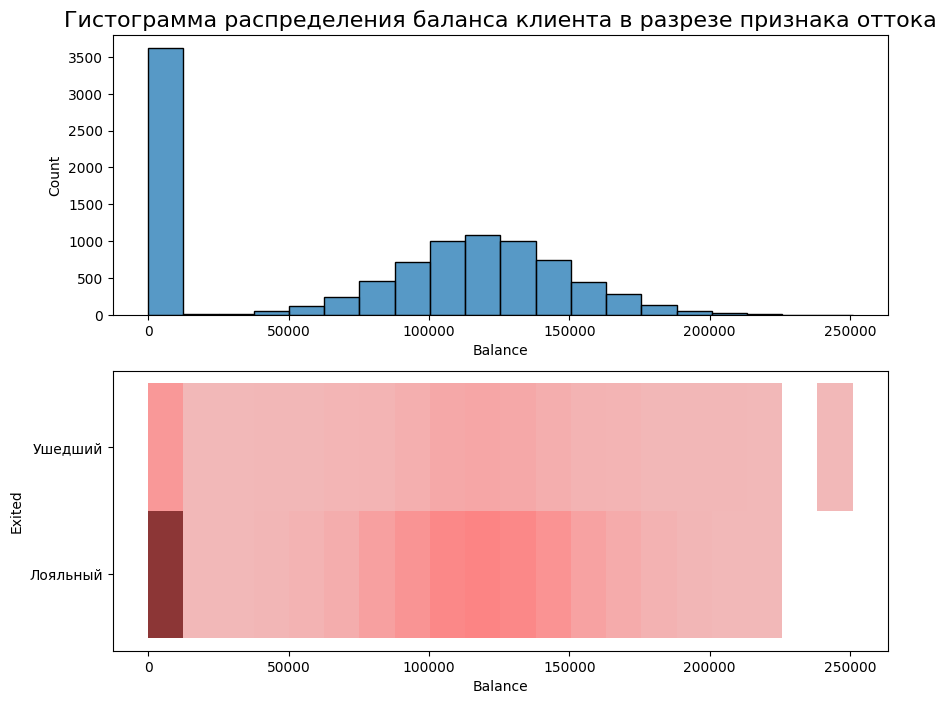

In [5]:
churn_df = churn_data.copy() # создаем копию таблицы churn_data
churn_df = churn_df.replace({'Exited':{0:'Лояльный', 1:'Ушедший'}}) # заменяем числовые значения на критерии 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_df,
    x='Balance',
    bins=20,
    kde=False,
    ax=axes[0]
);
axes[0].set_title('Гистограмма распределения баланса клиента в разрезе признака оттока', fontsize=16)
sns.histplot(
    data=churn_df,
    x='Balance',
    y='Exited',
    bins=20,
    color='red',
    ax=axes[1]
);

##### Вывод: Выброс с нулевыми балансами можно опустить. Большенство ушедших клиентов имело на счету более 100000, в числе которых клиенты с максимальными вкладами. Причины ухода могли быть следующими:
##### - огранечение снятия наличных через банкомат или терминал;
##### - высокие ставки на кредитование;
##### - низкие ставки по депозиту;
##### - навязывание банком дополнительных услуг.

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

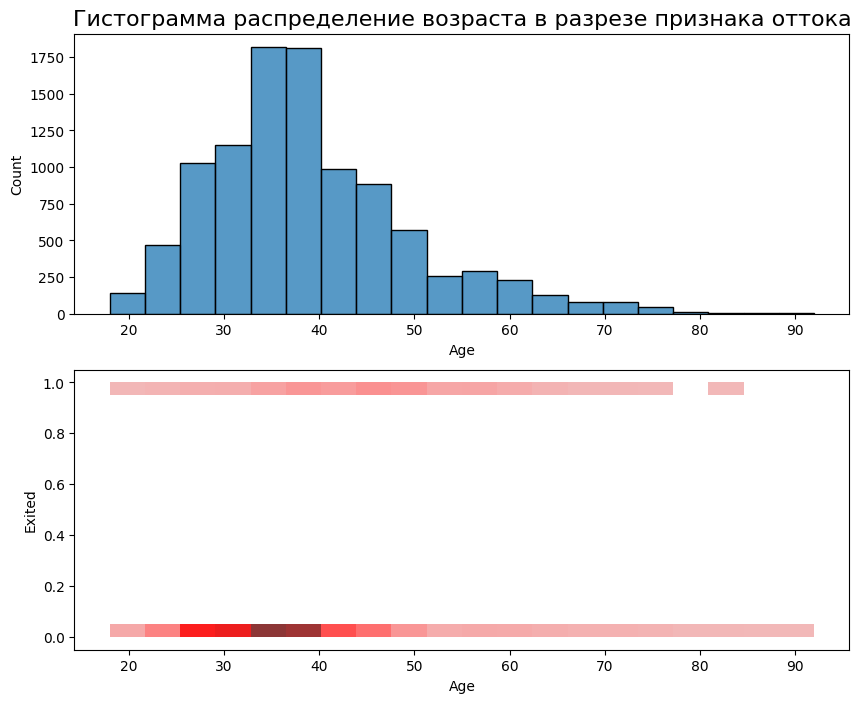

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_data,
    x='Age',
    bins=20,
    kde=False,
    ax=axes[0]
);
axes[0].set_title('Гистограмма распределение возраста в разрезе признака оттока', fontsize=16)
sns.histplot(
    data=churn_data,
    x='Age',
    y='Exited',
    bins=20,
    color='red',
    ax=axes[1]
);

##### Вывод: Большенство ушедших клиентов имело среднюю и старшую возрастную категорию (более 33 лет). Банку стоит обратить внимание на возрастную категорию от 36 до 53 лет.

##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [7]:
fig = px.scatter(
    churn_data,
    x="EstimatedSalary",
    y="CreditScore",
    color="Exited")

fig.show()

##### Вывод: Очевидной зависимости нет.

##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

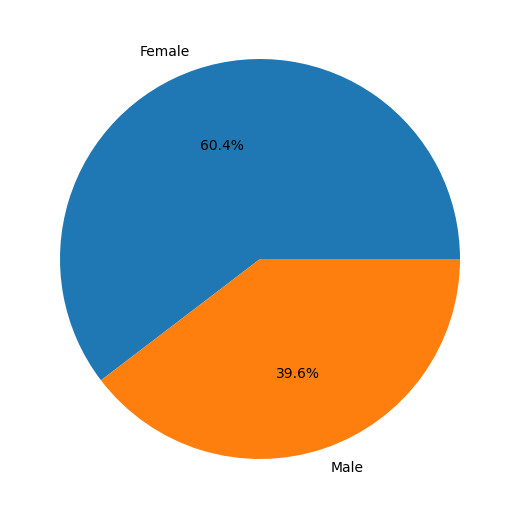

In [8]:
Gender_mean = churn_data.groupby('Gender')['Exited'].mean() # находим долю ушедших клиентов в каждой группе

fig = plt.figure(figsize=(5, 5)) # строим график в процентном отношении
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Gender_mean,
    labels=Gender_mean.index,
    autopct='%.1f%%'
);

##### Вывод: Чаще уходят женщины.

##### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [13]:
bar_data = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False).count() # проводим группировку данных по признаку количества услуг и лояльности
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='CustomerId',
    color='Exited',
    barmode='group',
    height=400,
    width=700,
    title='Соотношение ушедших и лольяных клиентов в зависимости от числа услуг'
)
fig.show()

##### Вывод: У лояльных клиентов количество подключенных услуг варируется от 1 до 2-х, в то время как у ушедших подключенных услуг было до 4-х. Вероятно банк-конкурент предложил большее количество услуг с хорошим тарифами.

##### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
bar_data = churn_df.groupby(['IsActiveMember', 'Exited'], as_index=False).count()# проводим группировку данных по признаку активности и лояльности клента
bar_data= bar_data.replace({'IsActiveMember':{0:'Неактивный', 1:'Активный'}})# заменяем числовые значения на критерии 
fig = px.bar(
    data_frame=bar_data,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=400,
    width=700,
    title='Соотношение активности ушедших и лольяных клиентов'
)
fig.show()

##### Вывод: Чаще уходят неактивные клиенты. Банку можно предложить создать систему мотивации в виде увеличенного кэшбека.

##### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
loyatlity_chor=churn_data.groupby(['Geography'], as_index=False)['Exited'].mean() # находим долю ушедших клиентов по каждой стране

#строим график
fig = px.choropleth(
    data_frame=loyatlity_chor,
    locations="Geography", #столбец с локациями
    locationmode = "country names",
    color="Exited", #от чего зависит цвет
    title='Распределение долей ушедших клиентов на карте',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

#отображаем график
fig.show()

##### Вывод: Максимальная доля ушедших клиентов в Германии. Возможная причина - в данной стране клиенты более требовательны к банковским услугам.

##### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(). Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
##### Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
##### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Exited                                                     
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333  \
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

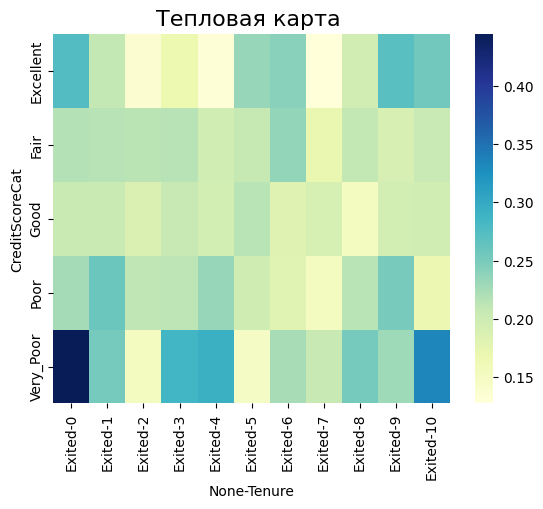

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat) #создаём признак CreditScoreCat — категории кредитного рейтинга
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category') # меняем тип столбца
cat_score=churn_data.groupby(['CreditScoreCat','Tenure'])[['Exited']].mean().unstack() # создаем сводную таблицу
display(cat_score)
heatmap = sns.heatmap(data=cat_score, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ', fontsize=16);

##### Вывод: Чаще всего уходят клиенты с очень низким кредитным рейтингом.